#  <font color=red> Module_11_視覺化_使用 pandas 和 seaborn 繪圖</font>

## 折線圖

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
from datetime import datetime

# index 被當作 x 軸的刻度
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))
s

0    -0.761001
10    0.610972
20    0.972259
30    0.549657
40    1.482886
50    0.104772
60    0.382716
70   -0.525778
80    0.626454
90    1.777765
dtype: float64

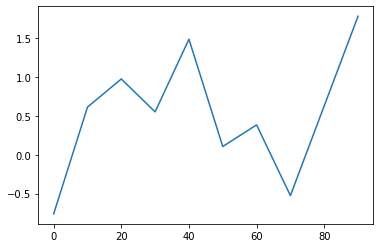

In [2]:
s.plot()
plt.show()

---

In [3]:
np.random.randn(10, 4)

array([[-0.90310264, -0.29219927,  1.35752697,  0.12123157],
       [-1.14321934,  0.81383755, -0.35186748,  1.77964315],
       [ 0.62988528,  0.72248597, -1.62454311, -0.04798299],
       [-0.35772569,  0.08085307, -1.00220567,  0.94128032],
       [-0.09596453,  0.58359393,  0.86899661,  0.09616904],
       [-0.8999795 , -1.76233777,  2.74469264,  0.74067373],
       [ 0.0352633 ,  2.21813361, -1.23696518, -0.94505417],
       [ 1.99527095,  0.1529792 ,  0.17336424,  0.38620021],
       [-0.33722474,  0.61994201, -1.48433217, -0.12759182],
       [-1.56462215, -1.09977458, -0.057065  , -1.37186176]])

In [4]:
# ndarray 的 cumsum 與 dataframe 的 cumsum 的預設在 axis 上有不同
df = pd.DataFrame(np.random.randn(10, 4).cumsum(axis = 0),
                columns = ['A', 'B', 'C', 'D'],
                index = np.arange(0, 100, 10))
df

,A,B,C,D
0,0.431562,1.295703,0.221628,-1.100541
10,-0.036999,-0.320095,0.247951,-1.332110
20,-0.145306,-0.844319,-1.024148,0.070008
30,-1.222577,-1.906903,-2.717999,1.414993
40,-0.931258,-3.587608,-3.303952,2.093628
50,-1.310718,-1.891509,-2.264089,3.581672
60,-0.850948,-3.512962,-2.230925,4.225246
70,-1.144890,-4.619282,-2.085952,3.104567
80,0.113229,-6.310126,-1.944261,3.001533
90,-0.865938,-5.557601,-2.082534,1.739103


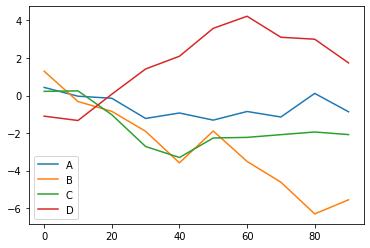

In [5]:
df.plot()
plt.show()

---

In [6]:
# 建立時間序列圖表
np.random.seed(111111)
index = pd.date_range('2012-01-01', '2014-12-31')
s = pd.Series(np.random.randn(len(index)), index = index )
s

2012-01-01   -1.878324
2012-01-02    1.362367
2012-01-03   -0.925862
2012-01-04    0.064894
2012-01-05   -0.437572
                ...   
2014-12-27   -0.968890
2014-12-28   -0.185859
2014-12-29    0.058782
2014-12-30    0.558471
2014-12-31    1.429698
Freq: D, Length: 1096, dtype: float64

In [7]:
walk_ts = s.cumsum()
walk_ts

2012-01-01    -1.878324
2012-01-02    -0.515957
2012-01-03    -1.441819
2012-01-04    -1.376925
2012-01-05    -1.814497
                ...    
2014-12-27   -40.545604
2014-12-28   -40.731462
2014-12-29   -40.672681
2014-12-30   -40.114210
2014-12-31   -38.684512
Freq: D, Length: 1096, dtype: float64

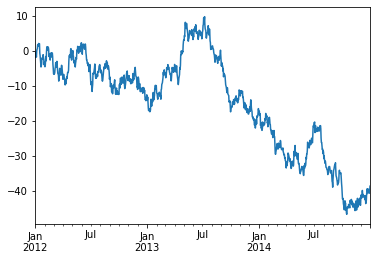

In [8]:
walk_ts.plot()
plt.show()

In [9]:
# 沒給行名，所以是預設值
walk_df = pd.DataFrame(walk_ts)
walk_df

,0
2012-01-01,-1.878324
2012-01-02,-0.515957
2012-01-03,-1.441819
2012-01-04,-1.376925
2012-01-05,-1.814497
...,...
2014-12-27,-40.545604
2014-12-28,-40.731462
2014-12-29,-40.672681
2014-12-30,-40.114210


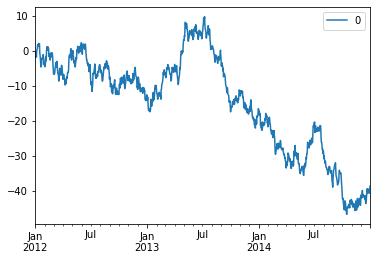

In [10]:
# 資料序列的繪圖與只有一行的資料框繪圖，兩者的結果類似
# 但如果是從資料框產生圖形，預設會有圖例
walk_df.plot();

---

In [11]:
np.random.seed(111111)
df = pd.DataFrame(np.random.randn(1096, 2),
                 index = walk_ts.index,
                 columns = list('AB'))
walk_df = df.cumsum()
walk_df.head()

,A,B
2012-01-01,-1.878324,1.362367
2012-01-02,-2.804186,1.427261
2012-01-03,-3.241758,3.165368
2012-01-04,-2.750550,3.332685
2012-01-05,-1.620667,2.930017


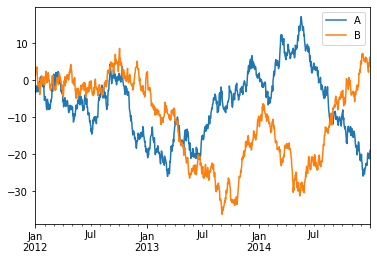

In [12]:
# 如果 Dataframe 的行數不只一行，.plot()的圖例會增加好幾項，且每條線的顏色都不一樣
walk_df.plot()
plt.show()

---

In [13]:
df2 = walk_df.copy()
df2['C'] = pd.Series(np.arange(0, len(df2)), index = df2.index)
df2

,A,B,C
2012-01-01,-1.878324,1.362367,0
2012-01-02,-2.804186,1.427261,1
2012-01-03,-3.241758,3.165368,2
2012-01-04,-2.750550,3.332685,3
2012-01-05,-1.620667,2.930017,4
...,...,...,...
2014-12-27,-20.952692,4.689279,1091
2014-12-28,-20.476150,3.965521,1092
2014-12-29,-21.250542,4.243064,1093
2014-12-30,-19.930892,6.237730,1094


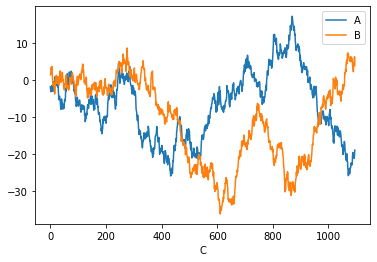

In [14]:
# 如果想把 Dataframe 的其中一行資料當作 x 軸的標籤，可使用 x 參數指定作為標籤的行名，用 y 軸參數指定要繪製那些行的資料點
df2.plot(x = 'C', y = ['A', 'B'])
plt.show()

### 加上標題及改變繪圖軸標籤

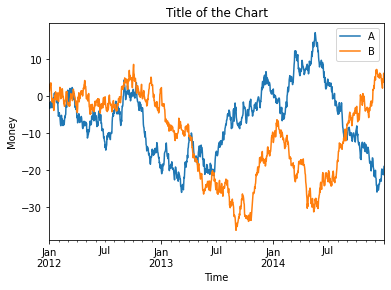

In [15]:
# 繪圖軸的設定是在呼叫 .plot() 方法後，直接利用 plt.xlable() 及 plt.ylable() 函式
# 當然也可以使用 plt.title('Title of the Chart')
walk_df.plot(title = 'Title of the Chart')
plt.xlabel('Time')
plt.ylabel('Money')
plt.show()

### 指定圖例的內容及位置

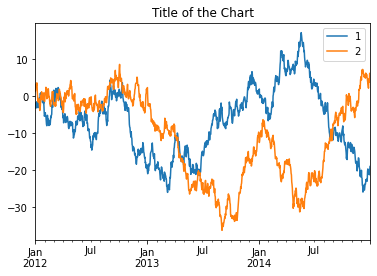

In [16]:
# 要改圖例中的每一個資料序列的文字，可以利用 .plot() 傳回的 ax 物件的 .legend() 方法。
# 該物件是個 AxesSubplot 物件，可以在圖形產生前改變圖形的許多特性

ax = walk_df.plot(title = 'Title of the Chart')
ax.legend(['1','2'])
plt.show()

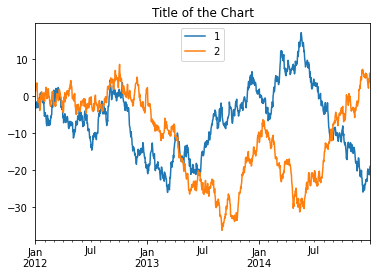

In [17]:
# 也可以使用 ax = plt.gca()
# loc 參數的預設是 'best'
walk_df.plot(title = 'Title of the Chart')
ax = plt.gca()
ax.legend(['1','2'], loc = 'upper center')
plt.show()

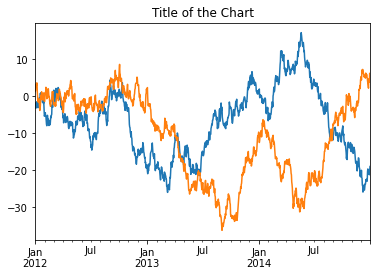

In [18]:
# 可以透過 legend = False 關掉圖例
walk_df.plot(title='Title of the Chart', legend = False)
plt.show()

### 指定線條顏色、樣式、寬度與標記

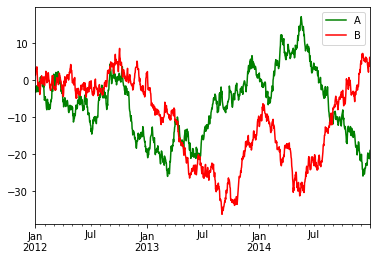

In [19]:
# 顏色可以使用內建的單一字元編碼，或是十六進位的 RGB 編碼指定顏色，格式是 #RRGGBB
walk_df.plot(style = ['g', '#ff0000'])
plt.show()

In [20]:
# 線條樣式碼指定，可以直接接在顏色碼後面
x = np.arange(0, 5., 0.2)
y1 = x
y2 = x**1.5
y3 = x**2.0
y4 = x**2.5
y5 = x**3.0

line_style = pd.DataFrame({0: y1,
                           1: y2,
                           2: y3,
                           3: y4,
                           4: y5}, index = x)
line_style.head()

,0,1,2,3,4
0.0,0.0,0.000000,0.00,0.000000,0.000
0.2,0.2,0.089443,0.04,0.017889,0.008
0.4,0.4,0.252982,0.16,0.101193,0.064
0.6,0.6,0.464758,0.36,0.278855,0.216
0.8,0.8,0.715542,0.64,0.572433,0.512


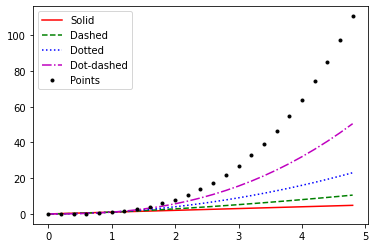

In [21]:
lagend_lables = ['Solid', 'Dashed', 'Dotted', 'Dot-dashed', 'Points']
ax = line_style.plot(style = ['r-', 'g--', 'b:', 'm-.', 'k.'])
ax.legend(lagend_lables, loc = 'upper left')
plt.show()

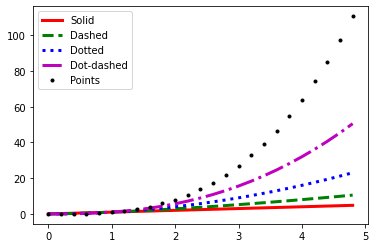

In [22]:
# 可透過傳入寬度串列指定多條線的寬度，或是只用單一寬度套用到所有線
# linewidth = lw
ax = line_style.plot(style = ['r-', 'g--', 'b:', 'm-.', 'k.'], lw= 3)
ax.legend(lagend_lables, loc = 'upper left')
plt.show()

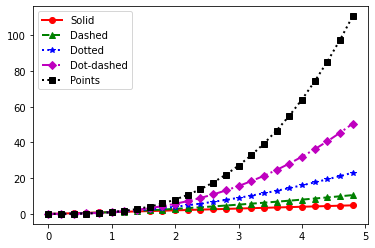

In [23]:
# 線條上的標記也能用樣式碼來指定
# 依序是圓形、三角形向上、星形、鑽石、方形
# https://matplotlib.org/stable/api/markers_api.html
ax = line_style.plot(style = ['r-o', 'g--^', 'b:*', 'm-.D', 'k:s'], lw = 2)
ax.legend(lagend_lables, loc = 'upper left')
plt.show()

### 指定刻度位置及標籤

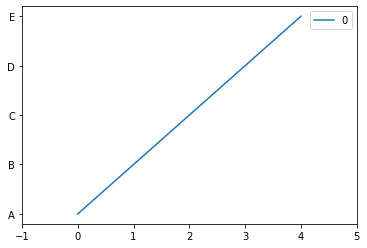

In [24]:
# 第一個參數 傳入 ticks
# 每個刻度位置的標籤還能作為第二個參數傳入函數，以進行指定
ticks_data = pd.DataFrame(np.arange(0, 5))
ticks_data.plot()
plt.xticks(ticks = np.arange(-1, 6))
plt.yticks(ticks = np.arange(0, 5), labels = list('ABCDE'))
plt.show()

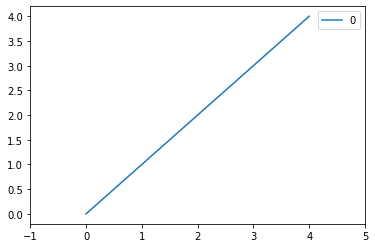

In [25]:
ticks_data = pd.DataFrame(np.arange(0, 5))
ticks_data.plot()
a, b = plt.xticks(ticks = np.arange(-1, 6))
plt.show()

In [26]:
a

In [27]:
b

[Text(-1, 0, '−1'),
 Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5')]

### 使用格式器格式化軸上的刻度日期標籤

In [28]:
np.random.seed(111111)
index = pd.date_range('2012-01-01', '2014-12-31')
df = pd.DataFrame(np.random.randn(len(index),2 ),
                 index = index,
                 columns = list('AB'))
walk_df = df.cumsum()
walk_df

,A,B
2012-01-01,-1.878324,1.362367
2012-01-02,-2.804186,1.427261
2012-01-03,-3.241758,3.165368
2012-01-04,-2.750550,3.332685
2012-01-05,-1.620667,2.930017
...,...,...
2014-12-27,-20.952692,4.689279
2014-12-28,-20.476150,3.965521
2014-12-29,-21.250542,4.243064
2014-12-30,-19.930892,6.237730


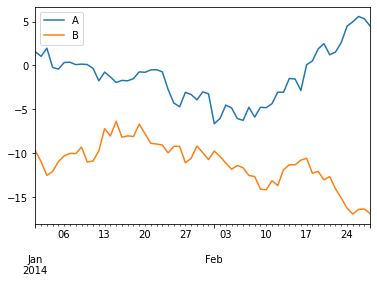

In [29]:
# 此時 x 軸上有兩個序列，一個次要(minor)及一個主要(major)
# 次要標籤標是一個月的某一天
# 主要標籤則包括年及月，但只有第一個月才有年標籤
# 每個主要及次要標籤都能透過設定定位器跟格式器來改變其值
walk_df.loc['2014-01':'2014-02'].plot()
plt.show()

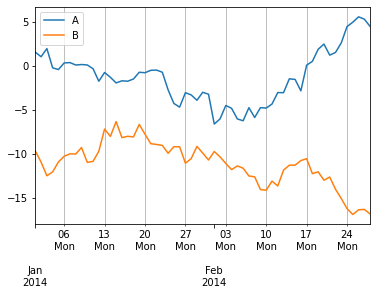

In [30]:
# https://docs.python.org/3/library/datetime.html#datetime.tzinfo
# MinuteLocator、 HourLocator、DayLocator、WeekdayLocator、MonthLocator、YearLocator: 這些特殊定位器是用來決定各種日期欄位的刻度在軸上的位置#
# DateFormatter: 這是用來格式化日期物件，使其成為軸上標籤的類別

from matplotlib.dates import WeekdayLocator, DateFormatter, MonthLocator

ax = walk_df.loc['2014-01':'2014-02'].plot()

# 修改次要標籤
weekday_locator = WeekdayLocator(byweekday = 0, interval = 1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter("%d\n%a"))

# 修改主要標籤
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'))

# 是否繪出格線
ax.xaxis.grid(True, 'minor')
ax.xaxis.grid(False, 'major')
plt.show()

---

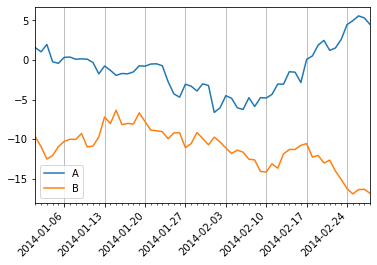

In [31]:
ax = walk_df.loc['2014-01':'2014-02'].plot()

# 修改主要標籤
ax.xaxis.set_major_locator(weekday_locator)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

# 旋轉 x軸的日期標籤
fig = plt.gcf()
fig.autofmt_xdate(rotation = 45)

# 是否繪出格線
ax.xaxis.grid(True, "major") 
plt.show()

## 以柱狀圖顯示相對差異

In [32]:
# make a bar plot
np.random.seed(111111)
s = pd.Series(np.random.rand(10) - 0.5)
s

0    0.076406
1   -0.105343
2    0.028186
3   -0.402140
4    0.320342
5    0.408433
6   -0.490027
7    0.205332
8    0.217187
9   -0.054677
dtype: float64

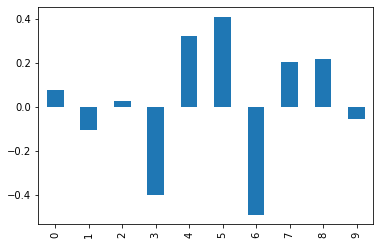

In [33]:
s.plot(kind = 'bar')
plt.show()

---

In [34]:
# 多重序列的柱狀圖也用來比較每個 x 軸標籤上的多個值
np.random.seed(111111)
df2 = pd.DataFrame(np.random.rand(10, 4),
                  columns = ['a', 'b', 'c', 'd'])
df2

,a,b,c,d
0,0.576406,0.394657,0.528186,0.097860
1,0.820342,0.908433,0.009973,0.705332
2,0.717187,0.445323,0.650719,0.942483
3,0.382860,0.828695,0.938694,0.546024
4,0.302687,0.043013,0.414173,0.503440
5,0.226060,0.323951,0.273772,0.359828
6,0.758962,0.872668,0.454171,0.731148
7,0.677727,0.010610,0.919141,0.489711
8,0.710850,0.971763,0.154796,0.754658
9,0.143164,0.020395,0.270441,0.370609


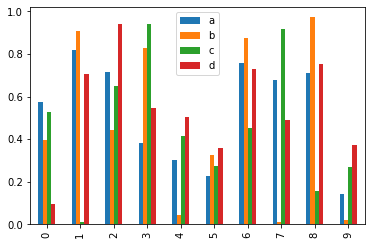

In [35]:
df2.plot(kind = 'bar')
plt.show()

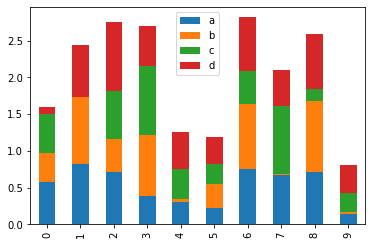

In [36]:
# 能夠透過 stacked = True 參數把柱子往上堆疊，而不是畫成並排
df2.plot(kind = 'bar', stacked = True)
plt.show()

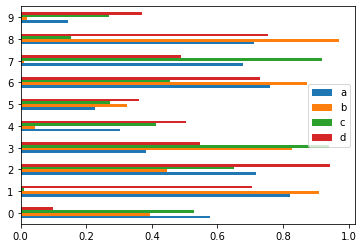

In [37]:
# 水平柱狀圖
df2.plot(kind = 'barh')
plt.show()

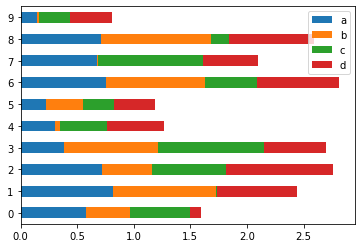

In [38]:
df2.plot(kind = 'barh', stacked = True)
plt.show()

---

In [39]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data

a    0.213104
b    0.654384
c    0.962573
d    0.391578
e    0.111292
f    0.027692
g    0.827023
h    0.946465
i    0.615641
j    0.684912
k    0.553225
l    0.474768
m    0.433093
n    0.804393
o    0.957039
p    0.382238
dtype: float64

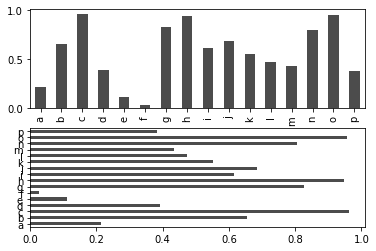

In [40]:
fig, axes = plt.subplots(2, 1)
data.plot.bar(ax = axes[0], color = 'k', alpha=0.7)
data.plot.barh(ax = axes[1], color = 'k', alpha=0.7)
plt.show()

---

In [41]:
np.random.seed(12348)
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns = pd.Index(['A', 'B', 'C', 'D'], name = 'Genus'))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


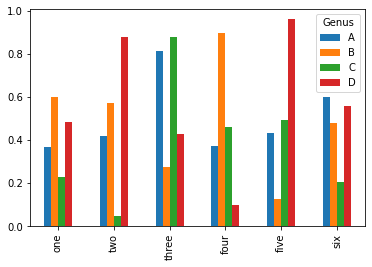

In [42]:
# 在 Datafrome 欄位中的名稱 "Genus" 是用來當作圖例的標題使用
df.plot.bar()
plt.show()

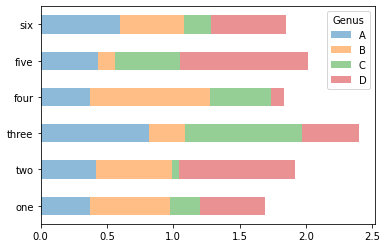

In [43]:
df.plot.barh(stacked = True, alpha = 0.5)
plt.show()

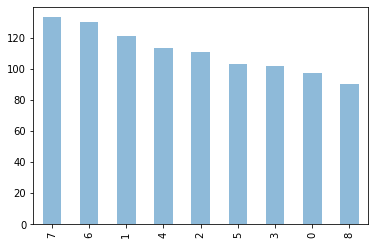

In [44]:
# 想用長條圖視覺化表達 Series 中值出現的頻率時，請用 value_counts
s = pd.Series(np.random.randint(0, 9, 1000))
s.value_counts().plot.bar(alpha = 0.5)
plt.show()

---

In [45]:
tips = pd.read_csv('./mod11/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [46]:
tips['tips_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips[:5]

,total_bill,tip,smoker,day,time,size,tips_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


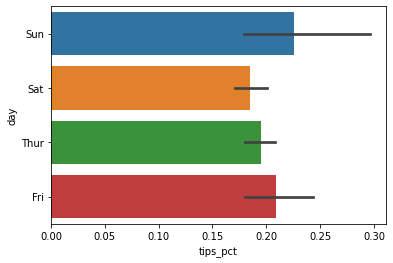

In [47]:
# 不同天小費的百分比例 (帶有誤差顯示)
# 圖中長條是 tip_pct 的平均值
# 畫在長條上的黑色線條，代表 %95 的信心程度
sns.barplot(x = 'tips_pct', y = 'day', data = tips, orient = 'h')
plt.show()

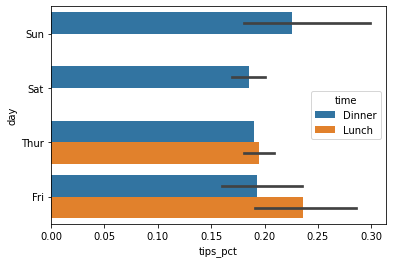

In [48]:
# sns.barplot 有一個 hue選項，用來幫我們區分其他類的值
# 可用 sns.set(style = 'whitegrid') 來改變繪圖的外觀
sns.barplot(x = 'tips_pct', y = 'day', hue = 'time', data = tips, orient = 'h')
plt.show()

## 以直方圖畫出資料分布

In [49]:
np.random.seed(111111)
df = pd.DataFrame(np.random.randn(1000))
df[:5]

,0
0,-1.878324
1,1.362367
2,-0.925862
3,0.064894
4,-0.437572


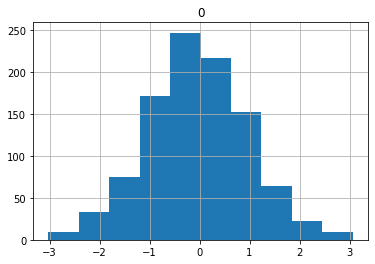

In [50]:
# create a histogram
df.hist()
plt.show()

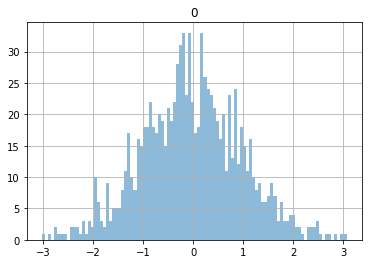

In [51]:
# 指定圖形的分組數目，便能控制直方圖的解析度
# bins 的預設值是 10
df.hist(bins = 100, alpha = 0.5)
plt.show()

---

In [52]:
np.random.seed(111111)
df = pd.DataFrame(np.random.randn(1000, 4),
                   columns = ['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-1.878324,1.362367,-0.925862,0.064894
1,-0.437572,1.738107,0.491208,0.167316
2,1.129883,-0.402668,0.073876,0.704181
3,-0.122904,-0.053066,0.106313,-2.652280
4,-0.708080,-1.101806,-0.836509,-1.350070
...,...,...,...,...
995,0.533544,1.212515,0.276475,0.190150
996,-0.831434,0.230583,0.599695,1.908485
997,-2.561038,1.027329,-0.874943,0.596250
998,-0.547905,0.005701,0.399123,0.703238


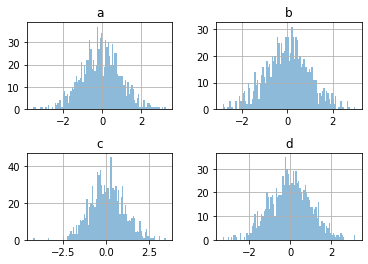

In [53]:
# 如果資料有好幾個序列，直方圖函數會自動產生多個直方圖
# 也可以用 plt.tight_layout() 自動幫調子圖
df.hist(bins = 100, alpha = 0.5)
plt.subplots_adjust(wspace = 0.3, hspace = 0.5) 
plt.tight_layout
plt.show()

---

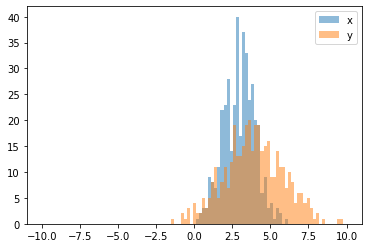

In [54]:
# 如果要將多個直方圖重疊在同一個圖表，可以在執行 .show() 函式前，呼叫 plt.hist() 函式很多次
np.random.seed(111111)
x = [np.random.normal(3, 1) for _ in range(400)]
y = [np.random.normal(4, 2) for _ in range(400)]
bins  = np.linspace(-10, 10, 100)
plt.hist(x, bins, alpha = 0.5, label = 'x') # alpha = 0.5 是透明度 50%
plt.hist(y, bins, alpha = 0.5, label = 'y')
plt.legend(loc = 'upper right')
plt.show()

---

In [55]:
tips = pd.read_csv('./mod11/tips.csv')
tips['tips_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips[:5]

,total_bill,tip,smoker,day,time,size,tips_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


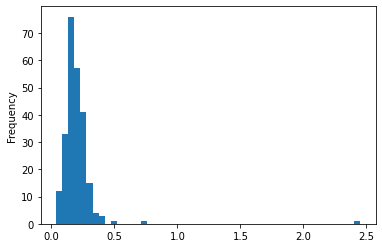

In [56]:
# 將小費佔每張帳單的百分比用直方圖顯示出來
tips['tips_pct'].plot.hist(bins = 50)
plt.show()

## 已核密度圖做分布估計

In [57]:
# 核密度圖並不純粹以經驗來表示資料，而是估算資料的真實分布，並且將資料平滑成連續的曲線
# create a kde density plot
np.random.seed(111111)
s = pd.Series(np.random.randn(1000))
s

0     -1.878324
1      1.362367
2     -0.925862
3      0.064894
4     -0.437572
         ...   
995    0.638239
996   -0.616597
997   -0.232545
998   -0.097162
999    0.174166
Length: 1000, dtype: float64

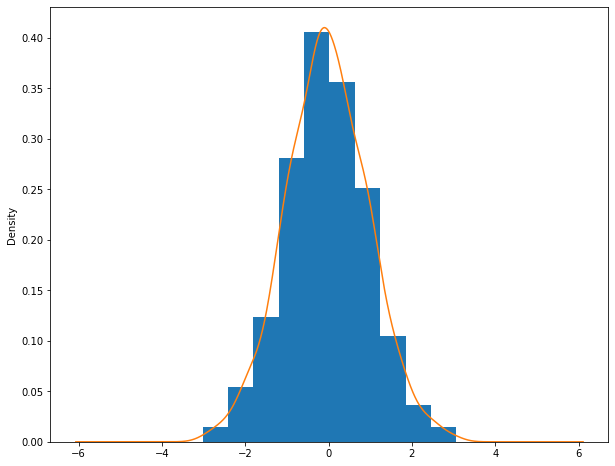

In [58]:
s.hist(density = True)
s.plot(kind = 'kde', figsize = (10, 8))
plt.show()

---

In [59]:
tips = pd.read_csv('./mod11/tips.csv')
tips['tips_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips[:5]

,total_bill,tip,smoker,day,time,size,tips_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:ylabel='Density'>

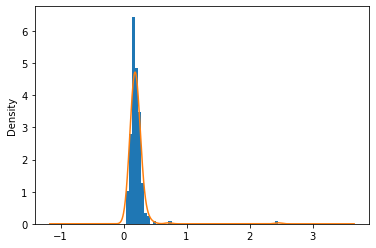

In [60]:
tips['tips_pct'].plot.hist(bins = 50, density = True)
tips['tips_pct'].plot.density()

---

In [61]:
# seaborn 有個 displot 方法，能使畫直方圖和密度圖更加容易
# 這個方法可以同時畫出直方圖和連續密度估計

comp1 = np.random.normal(0, 1, size = 200)
comp2 = np.random.normal(10, 2, size = 200)
values = pd.Series(np.concatenate([comp1, comp2]))
values

0      -0.006142
1      -1.700134
2      -1.297764
3      -1.114595
4      -1.789914
         ...    
395    11.703574
396    11.085296
397     6.028416
398     8.932254
399    10.191742
Length: 400, dtype: float64

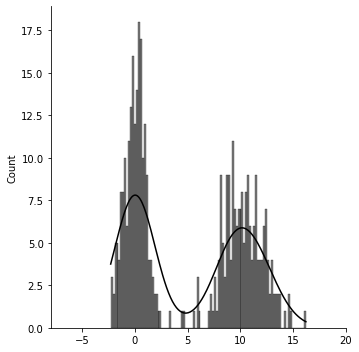

In [62]:
sns.displot(values, bins = 100, color = 'k', kde = True)
plt.xlim([-8, 20])
plt.show()

## 以散布圖顯示兩變數之間的關係

In [63]:
# 散布圖又稱點圖，在觀察二維序列資料的相互關係時很好用
np.random.seed(111111)
df = pd.DataFrame(np.random.randn(10000, 2),
                  columns = ['a', 'b'])
df

,a,b
0,-1.878324,1.362367
1,-0.925862,0.064894
2,-0.437572,1.738107
3,0.491208,0.167316
4,1.129883,-0.402668
...,...,...
9995,1.558957,0.179244
9996,-0.464000,-0.769144
9997,2.200993,1.266455
9998,0.423746,1.408599


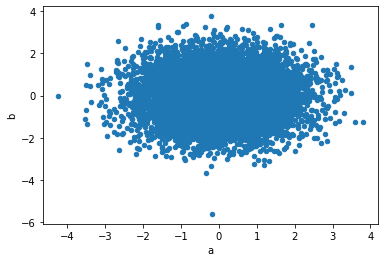

In [64]:
# 散布圖顯示一對變數的相關性
df.plot(kind = 'scatter', x = 'a', y = 'b')
plt.show()

---

In [65]:
import pandas_datareader as pdr
from datetime import datetime
# 從 yahoo 讀取微軟的股價資料
start = datetime(2016, 1, 1)
end = datetime(2016, 12, 31)
stock_data = pdr.data.DataReader("MSFT", 'yahoo', start, end)
stock_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,56.189999,55.419998,56.040001,55.480000,27334100.0,50.298271
2016-01-04,54.799999,53.389999,54.320000,54.799999,53778000.0,49.681782
2016-01-05,55.389999,54.540001,54.930000,55.049999,34079700.0,49.908436
2016-01-06,54.400002,53.639999,54.320000,54.049999,39518900.0,49.001831
2016-01-07,53.490002,52.070000,52.700001,52.169998,56564900.0,47.297417
...,...,...,...,...,...,...
2016-12-23,63.540001,62.799999,63.450001,63.240002,12403800.0,58.906746
2016-12-27,64.070000,63.209999,63.209999,63.279999,11763200.0,58.943993
2016-12-28,63.400002,62.830002,63.400002,62.990002,14653300.0,58.673874


In [66]:
stock_data['Close']

Date
2015-12-31    55.480000
2016-01-04    54.799999
2016-01-05    55.049999
2016-01-06    54.049999
2016-01-07    52.169998
                ...    
2016-12-23    63.240002
2016-12-27    63.279999
2016-12-28    62.990002
2016-12-29    62.900002
2016-12-30    62.139999
Name: Close, Length: 253, dtype: float64

In [67]:
# % change per day
delta = stock_data['Close'].pct_change()
delta = delta[1:]
delta

Date
2016-01-04   -0.012257
2016-01-05    0.004562
2016-01-06   -0.018165
2016-01-07   -0.034783
2016-01-08    0.003067
                ...   
2016-12-23   -0.004878
2016-12-27    0.000632
2016-12-28   -0.004583
2016-12-29   -0.001429
2016-12-30   -0.012083
Name: Close, Length: 252, dtype: float64

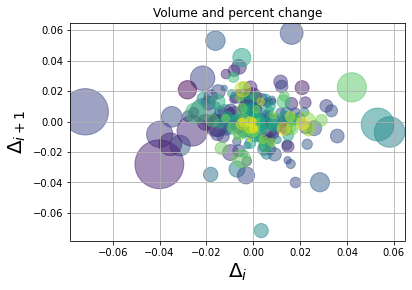

In [68]:
fig, ax = plt.subplots()
volume = (10*stock_data.loc[delta[:-1].index].Volume/stock_data.Volume[0])**2
close = stock_data.loc[delta[:-1].index].Close
ax.scatter(delta[:-1], delta[1:], c = close, s = volume, alpha = 0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize = 20)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize = 20)
ax.set_title('Volume and percent change')
ax.grid(True, 'major')
plt.show()

---

In [69]:
macro = pd.read_csv('./mod11/macrodata.csv')
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [70]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


In [71]:
# 計算 log 
np.log(data)

,cpi,m1,tbilrate,unemp
0,3.366606,4.939497,1.036737,1.757858
1,3.372455,4.953712,1.124930,1.629241
2,3.379293,4.945207,1.340250,1.667707
3,3.379974,4.941642,1.465568,1.722767
4,3.385745,4.938781,1.252763,1.648659
...,...,...,...,...
198,5.379386,7.296210,0.157004,1.791759
199,5.357407,7.362962,-2.120264,1.931521
200,5.359746,7.373249,-1.514128,2.091864
201,5.368165,7.410710,-1.714798,2.219203


In [72]:
# 計算差值
np.log(data).diff()

,cpi,m1,tbilrate,unemp
0,NaN,NaN,NaN,NaN
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


In [73]:
trans_data = np.log(data).diff().dropna()
trans_data.reset_index(inplace=True, drop = True)
trans_data

,cpi,m1,tbilrate,unemp
0,0.005849,0.014215,0.088193,-0.128617
1,0.006838,-0.008505,0.215321,0.038466
2,0.000681,-0.003565,0.125317,0.055060
3,0.005772,-0.002861,-0.212805,-0.074108
4,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
197,-0.007904,0.045361,-0.396881,0.105361
198,-0.021979,0.066753,-2.277267,0.139762
199,0.002340,0.010286,0.606136,0.160343
200,0.008419,0.037461,-0.200671,0.127339


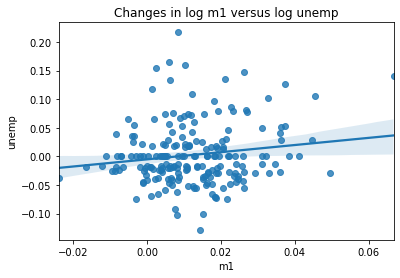

In [74]:
# 使用 seaborn 的 replot 方法，這個方法在畫散布圖的同時，會算出線性迴歸線
sns.regplot(x = 'm1', y = 'unemp', data = trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))
plt.show()

## 以散布圖矩陣表示多重變數的相關性

In [75]:
# 對於探索性資料分析來說，如果能看到一堆變數的散布圖是很有幫助的
# 這一堆圖被稱為散布圖矩陣

In [76]:
# create a scatter plot matrix
from pandas.plotting import scatter_matrix

np.random.seed(111111)
df = pd.DataFrame(np.random.randn(1000, 4),
                 columns = ['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-1.878324,1.362367,-0.925862,0.064894
1,-0.437572,1.738107,0.491208,0.167316
2,1.129883,-0.402668,0.073876,0.704181
3,-0.122904,-0.053066,0.106313,-2.652280
4,-0.708080,-1.101806,-0.836509,-1.350070
...,...,...,...,...
995,0.533544,1.212515,0.276475,0.190150
996,-0.831434,0.230583,0.599695,1.908485
997,-2.561038,1.027329,-0.874943,0.596250
998,-0.547905,0.005701,0.399123,0.703238


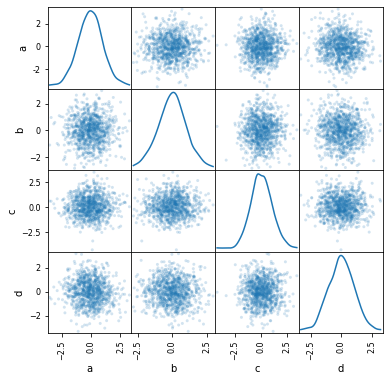

In [77]:
scatter_matrix(df, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')
plt.show()

---

In [78]:
trans_data

,cpi,m1,tbilrate,unemp
0,0.005849,0.014215,0.088193,-0.128617
1,0.006838,-0.008505,0.215321,0.038466
2,0.000681,-0.003565,0.125317,0.055060
3,0.005772,-0.002861,-0.212805,-0.074108
4,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
197,-0.007904,0.045361,-0.396881,0.105361
198,-0.021979,0.066753,-2.277267,0.139762
199,0.002340,0.010286,0.606136,0.160343
200,0.008419,0.037461,-0.200671,0.127339


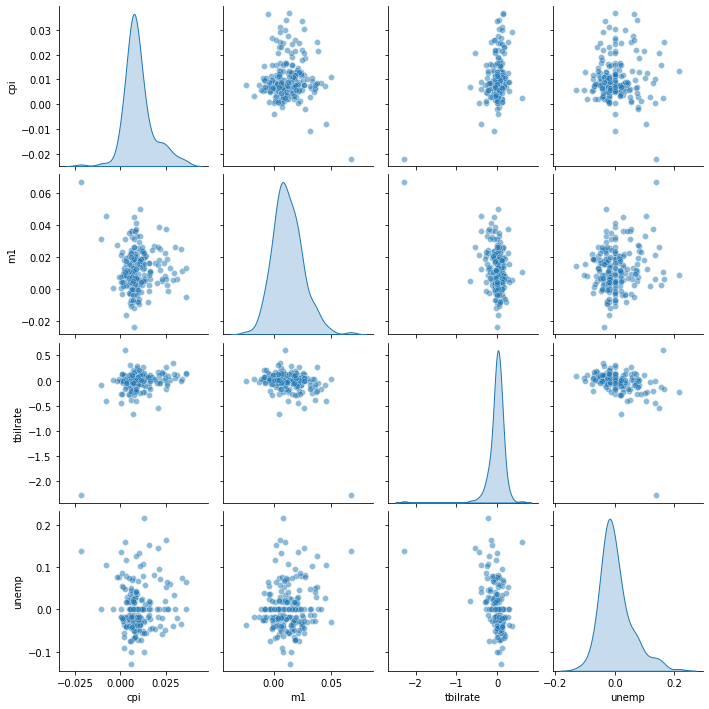

In [79]:
# 在 seaborn 有一個便利的 pairplot 函式
# plot_kws 參數，在我們畫非對角線的圖時，這個參數可以讓我們傳遞設定值
sns.pairplot(trans_data, diag_kind = 'kde', plot_kws={'alpha': 0.5})
plt.show()

## 層面圖組與分組資料

In [80]:
# 如果碰到有多個分組方法的資料集合時怎麼辦？ 使用層面圖組 (facet grid) 就能指定依多個分類變數來進行視覺化
# seaborn 有一個好用的內建函式，叫做 catplot，它可以簡易畫出許多層面圖 (facet plot)
# 可以用更通用的 seaborn.FaceGrid 類別來建立自己的層面圖組，詳細請見 seaborn 文件 (https://seaborn.pydata.org/)

In [81]:
tips = pd.read_csv('./mod11/tips.csv')
tips['tips_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips[:5]

,total_bill,tip,smoker,day,time,size,tips_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


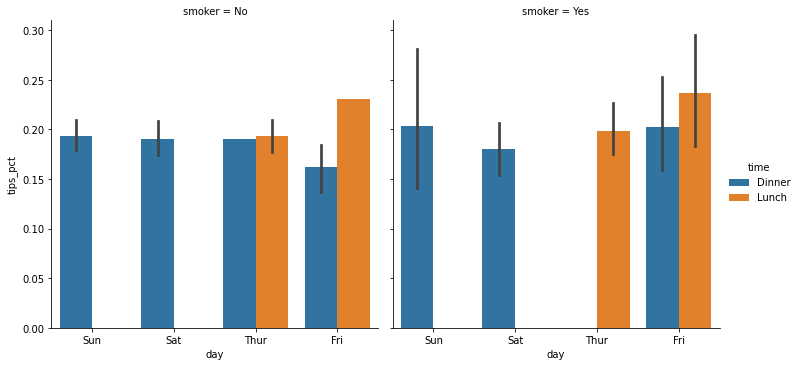

In [82]:
sns.catplot(x = 'day', y = 'tips_pct', hue = 'time', col = 'smoker', kind = 'bar', data = tips[tips.tips_pct < 1])
plt.show()

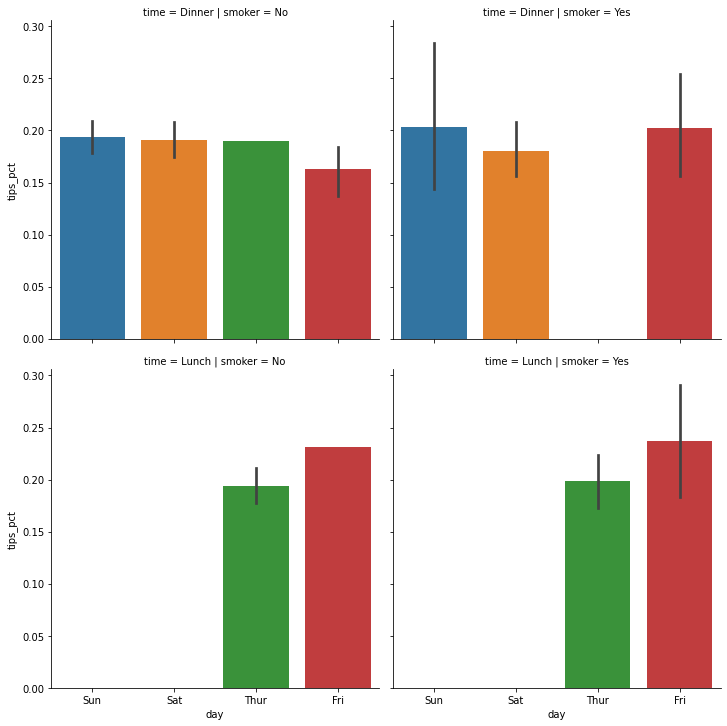

In [83]:
# 如果在層面圖中不想只用異色長條顯示 'time' 分組的話，還可以在層面圖組終將 time 分組擴增為新的一列圖
sns.catplot(x = 'day', y = 'tips_pct', row = 'time', col = 'smoker', kind = 'bar', data = tips[tips.tips_pct < 1])
plt.show()

## 箱形圖

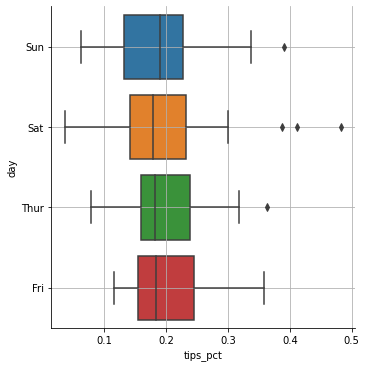

In [84]:
# 視你想要顯示的東西屬性為何，catplot 也支援其他可用的繪圖類型，舉例來說，箱形圖就是一種很有效率的圖形
sns.catplot(x = 'tips_pct', y ='day', kind ='box', data = tips[tips.tips_pct < 0.5])
plt.grid(True)
plt.show()

---

In [85]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 20]
df = pd.DataFrame(data, index = np.arange(len(data)))
df

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,20


In [86]:
df.describe()

,0
count,9.000000
mean,6.222222
std,5.651942
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,20.000000


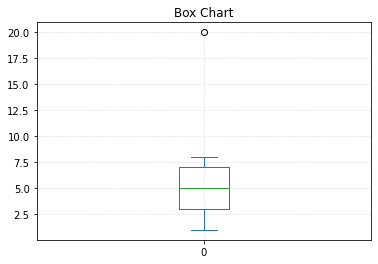

In [87]:
# IQR = 4
# create a box plot
df.plot.box(title="Box Chart")
plt.grid(linestyle="--", alpha = 0.3)
plt.show()

---

In [88]:
np.random.seed(111111)
dfb = pd.DataFrame(np.random.randn(10, 5))
dfb[:5]

,0,1,2,3,4
0,-1.878324,1.362367,-0.925862,0.064894,-0.437572
1,1.738107,0.491208,0.167316,1.129883,-0.402668
2,0.073876,0.704181,-0.122904,-0.053066,0.106313
3,-2.652280,-0.708080,-1.101806,-0.836509,-1.350070
4,0.511343,0.355325,1.701553,-0.337359,-0.020597


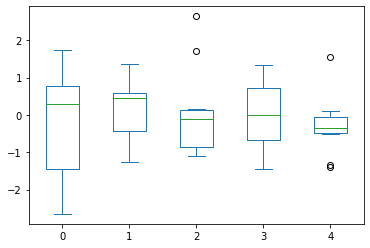

In [89]:
dfb.plot.box();

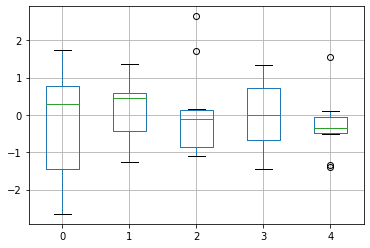

In [90]:
dfb.boxplot(return_type = 'axes');

## 以面積圖展示累積總數

In [91]:
# 面積圖用來表示隨著時間過去所累積的總數目，以及相關屬性之趨勢隨時間的改變
# 預設是產生堆疊式面積圖
np.random.seed(111111)
df = pd.DataFrame(np.random.rand(10, 4),
                  columns = ['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.576406,0.394657,0.528186,0.097860
1,0.820342,0.908433,0.009973,0.705332
2,0.717187,0.445323,0.650719,0.942483
3,0.382860,0.828695,0.938694,0.546024
4,0.302687,0.043013,0.414173,0.503440
5,0.226060,0.323951,0.273772,0.359828
6,0.758962,0.872668,0.454171,0.731148
7,0.677727,0.010610,0.919141,0.489711
8,0.710850,0.971763,0.154796,0.754658
9,0.143164,0.020395,0.270441,0.370609


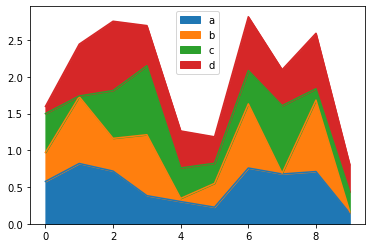

In [92]:
df.plot(kind = 'area')
plt.show()

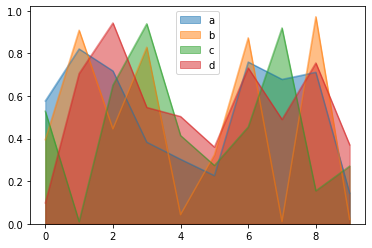

In [93]:
# 產生非堆疊式面積圖
# 預設的非堆疊面積圖的 alpha = 0.5
df.plot(kind = 'area', stacked = False)
plt.show()

## 以圖像表達多重變數的關係強弱

In [94]:
# 圖像 (image) 表達也可以稱為熱圖 (heatmap)
# 熱圖是一種資料的圖形表達法，其中矩陣值乃以顏色來表示，這是顯示兩變數測量值在交叉處之關係的一種有效的表達方式

In [95]:
# create a heatmap
s = pd.Series([0.0, 0.1, 0.2, 0.3, 0.4],
              ['V', 'W', 'X', 'Y', 'Z'])
heatmap_data = pd.DataFrame({'A' : s + 0.0,
                             'B' : s + 0.1,
                             'C' : s + 0.2,
                             'D' : s + 0.3,
                             'E' : s + 0.4,
                             'F' : s + 0.5,
                             'G' : s + 0.6
                     })
heatmap_data

,A,B,C,D,E,F,G
V,0.0,0.1,0.2,0.3,0.4,0.5,0.6
W,0.1,0.2,0.3,0.4,0.5,0.6,0.7
X,0.2,0.3,0.4,0.5,0.6,0.7,0.8
Y,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Z,0.4,0.5,0.6,0.7,0.8,0.9,1.0


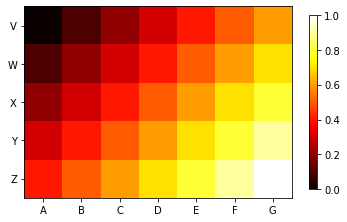

In [96]:
plt.imshow(heatmap_data, cmap = 'hot', interpolation = 'none')
plt.colorbar(shrink = 0.8)
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data)), heatmap_data.index);

## 綜合應用

In [97]:
tips = pd.read_csv('./mod11/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [98]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [99]:
# 去除 1 和 6 人用餐的情況
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [100]:
# 執行正規化，使得每列加總值為 1，並畫圖
party_pcts = party_counts.div(party_counts.sum(axis = 1), axis = 0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


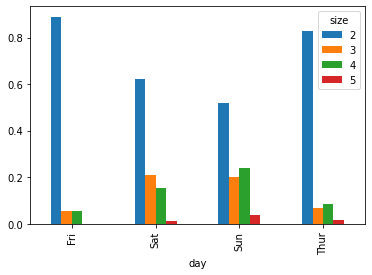

In [101]:
# 按星期幾以及每團用餐人數來劃分
party_pcts.plot.bar()
plt.show()

---

In [102]:
# 從 yahoo 讀取微軟的股價資料
start = datetime(2016, 1, 1)
end = datetime(2016, 12, 31)
stock_data = pdr.data.DataReader("MSFT", 'yahoo', start, end)
stock_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,56.189999,55.419998,56.040001,55.480000,27334100.0,50.298275
2016-01-04,54.799999,53.389999,54.320000,54.799999,53778000.0,49.681778
2016-01-05,55.389999,54.540001,54.930000,55.049999,34079700.0,49.908432
2016-01-06,54.400002,53.639999,54.320000,54.049999,39518900.0,49.001827
2016-01-07,53.490002,52.070000,52.700001,52.169998,56564900.0,47.297417
...,...,...,...,...,...,...
2016-12-23,63.540001,62.799999,63.450001,63.240002,12403800.0,58.906746
2016-12-27,64.070000,63.209999,63.209999,63.279999,11763200.0,58.944004
2016-12-28,63.400002,62.830002,63.400002,62.990002,14653300.0,58.673874


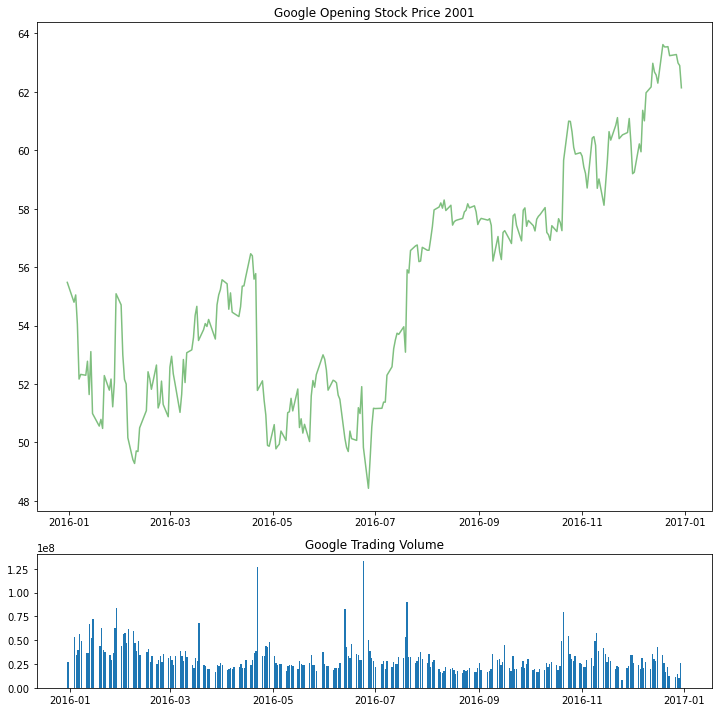

In [103]:
# 在上方畫出收盤價
top = plt.subplot2grid((4, 4), (0, 0), rowspan = 3, colspan = 4)
top.plot(stock_data.index, stock_data['Close'], label = 'Close', color = 'g', alpha = 0.5)
plt.title('Google Opening Stock Price 2001')
# 在下方畫出交易量
bottom = plt.subplot2grid((4, 4), (3, 0), rowspan = 1, colspan = 4)
bottom.bar(stock_data.index, stock_data['Volume'])
plt.title('Google Trading Volume')
# 設定畫布的尺寸
fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.tight_layout()
plt.show()

---

In [104]:
np.random.seed(111111)
df = pd.DataFrame(np.random.randn(1096,2),
                 index = pd.date_range('2012-01-01', '2014-12-31'),
                 columns = list('AB'))
walk_df = df.cumsum()
walk_df.head()

,A,B
2012-01-01,-1.878324,1.362367
2012-01-02,-2.804186,1.427261
2012-01-03,-3.241758,3.165368
2012-01-04,-2.750550,3.332685
2012-01-05,-1.620667,2.930017


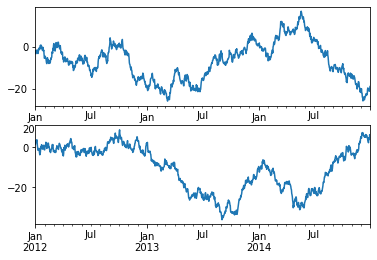

In [105]:
# 要在特定的子圖畫圖，就利用 ax 參數把目標軸物件傳入 .plot()
ax1 = plt.subplot2grid((2, 1), (0, 0))
ax2 = plt.subplot2grid((2, 1), (1, 0))
walk_df[walk_df.columns[0]].plot(ax = ax1)
walk_df[walk_df.columns[1]].plot(ax = ax2)
plt.show()